In [1]:

import xarray as xr
import os as os
import pandas as pd
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from IPython.display import display, HTML
from scipy import stats
display(HTML("<style>.container { width:70% !important; }</style>"))
def perform_t_test(data):
    p_values = np.zeros((80,320))
    for i in range(data.shape[1]-1):
        for j in range(data.shape[2]-1):
            # Assuming data is a numpy array of your precipitation values
            # Here, you need to define your control and experimental groups
            control_group = np.zeros(data.shape[0])  # Replace condition1 with your control group condition
            experimental_group = data[:,i, j]  # Replace condition2 with your experimental group condition
            
            # Perform the t-test
            t_statistic, p_value = stats.ttest_ind(control_group, experimental_group,equal_var=False)
            
            # Store the p-value in the corresponding location
            p_values[i, j] = p_value
    
    # Return the p-values for each point on the map
    return p_values

ist die SIconc auch total Modellabhängig und mit großer interner Variabilität verbunden?

<ipython-input-20-966dbdcd2de8>:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time = nc.variables['time'][:]
<ipython-input-20-966dbdcd2de8>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  var = nc.variables['MSL'][:]


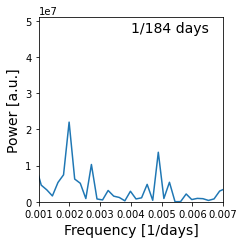

In [20]:
import xarray as xr
import os as os
import pandas as pd
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from IPython.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))
path = "N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/slp_hpa_ERA5_1985-2014.N_mjjaso_atrbg_aacrm21_remapbnds.nc"
#path_ext = "N:/atm_glomod/user/jomuel001/CMIP6_models/ACCESS-CM2/slp_hpa_ACCESS-CM2_2065-2100.N_djfm.nc"
fig = plt.figure(figsize=(3.5, 3.5))
#map = Basemap(projection='ortho',lat_0=90, lon_0=360)
nc = NetCDFFile(path)
#nc_ext = NetCDFFile(path_ext)
#print(nc)
#nc
mean=[]
mean_ext=[]
time = nc.variables['time'][:]
var = nc.variables['MSL'][:]
#var_ext = nc_ext.variables['psl'][:]
#time_ext = nc_ext.variables['time'][:]
for i in range(len(time)):
        timestamp =  i
        #variable = map.contourf(x,y,var[timestamp,:,:],cmap = 'bwr')
        def calculate_mean_2d_fast(array):
            array = np.array(array)
            filtered_array = array[ (array <= 10000)]
            mean = np.mean(filtered_array)
            return mean
        mean.append(var[timestamp,9,34]) 
# for i in range(len(time_ext)):
#         timestamp =  i
#         #variable = map.contourf(x,y,var[timestamp,:,:],cmap = 'bwr')
#         def calculate_mean_2d_fast(array):
#             array = np.array(array)
#             filtered_array = array[ (array <= 10000)]
#             mean = np.mean(filtered_array)
#             return mean
#         mean_ext.append(calculate_mean_2d_fast(var_ext[timestamp,:,:])) 

days=np.arange(1,len(time)+1,1)+31
df=1/(len(time)+1)  
fend=1/(days[1]-days[0])/2
freq=np.arange(0,fend,df)
fft = np.fft.rfft(mean)                             # Compute the FFT
psd = np.abs(fft)**2



plt.plot(freq[3:], psd[3:])
plt.xlabel('Frequency [1/days]',fontsize=14)
plt.ylabel('Power [a.u.]',fontsize=14)
plt.xlim(0.001,0.007)
plt.ylim(-1,5.1e7)
plt.text(0.004,4.7e7,"1/184 days",fontsize=14)
#axs[1].set_ylim(-1,100000000)
#for i in range(1,31):
   # plt.vlines(184*i,-40+1005,40+1005,'grey', alpha=0.3)
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/Dokumente/Vortrag/atmoseminar/fourier-danach.png",dpi=300)

In [21]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))

<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)


<ipython-input-31-aeaa79e2dbc9>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_hist.variables['lat'][:]
<ipython-input-31-aeaa79e2dbc9>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc_hist.variables['lon'][:]
<ipython-input-31-aeaa79e2dbc9>:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

(5520,)
(11040,)
(11040,)
Slope:  -2.209069691064373e-05
Intercept:  1013.8299629115298


<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

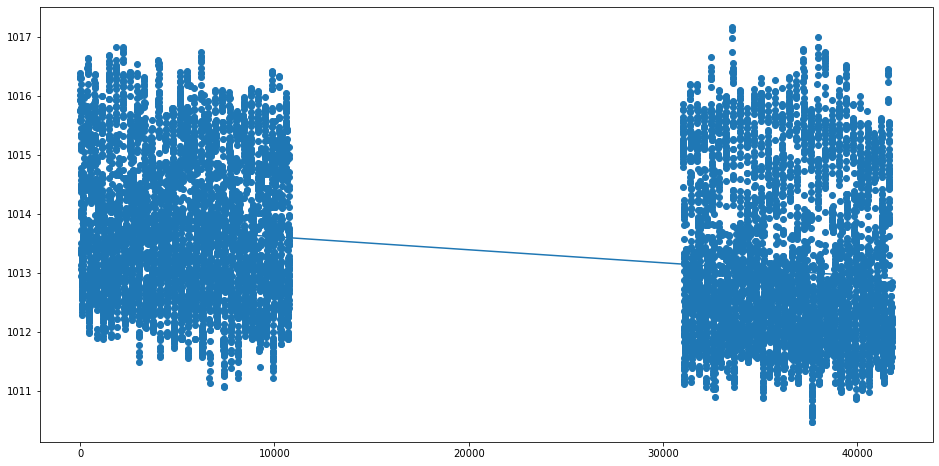

In [31]:
import xarray as xr
import os as os
import pandas as pd
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM"]
#models=["ACCESS-CM2"]
var_modelmean=np.zeros((len(models),11040))
for i in range(0,len(models)):
    model=models[i]
    path_fut = r"N:/atm_glomod/user/jomuel001/CMIP6_models/"+model+"/slp_hpa_"+model+"_2070-2099.Nor_mjjaso.nc"
    path_hist = r"N:/atm_glomod/user/jomuel001/CMIP6_models/"+model+"/slp_hpa_"+model+"_1985-2014.Nor_mjjaso.nc"
    fig = plt.figure(figsize=(16, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    nc_fut = NetCDFFile(path_fut)
    nc_hist = NetCDFFile(path_hist)
    #print(nc)
    #nc

    lat = nc_hist.variables['lat'][:]
    lon = nc_hist.variables['lon'][:]
    time_fut = nc_fut.variables['time'][:]
    var_fut = nc_fut.variables['psl'][:] # mean sea level pressure
    time_hist = nc_hist.variables['time'][:]
    var_hist = nc_hist.variables['psl'][:] 
    #jun-30, jul-31, aug-31, sep=30
    print(np.shape(time_fut))
    time=np.concatenate((time_hist,time_fut))-time_hist[0]
    var=np.concatenate((var_hist,var_fut))
    var=np.mean(var,axis=(1,2))
    print(np.shape(var))
    print(np.shape(time))
    var_modelmean[i]=var
    
coeffs = np.polyfit(time, np.mean(var_modelmean,axis=0), 1)
slope = coeffs[0]
intercept = coeffs[1]
fit_fn = np.poly1d(coeffs)
    # print slope and intercept
print("Slope: ", slope)
print("Intercept: ", intercept)
plt.plot(time,fit_fn(time))
plt.scatter(time,np.mean(var_modelmean,axis=0))
plt.show()
# variable = map.contourf(x,y,var[timestamp,:,:],cmap = 'seismic', vmin=-50, vmax=50)
# cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
# plt.title('SLP over years')
# cb.set_label('%')
# #cb.clim(0,1)
# #cb.set_clim(vmin=0,vmax=100)
# #print(np.size(time))
# map.drawcoastlines()
# map.drawcountries()

# print(time[timestamp])
# Jahr = int(str(time[timestamp])[:2])+1932
# Monat = int(str(time[timestamp])[2])+4
# Tag = int(str(time[timestamp])[3:5])-35
# print('Datum : '+str(Tag)+'.'+str(Monat)+'.'+str(Jahr))
# def calculate_mean_2d(array):
#     filtered_array = [[x for x in row if x <= 100] for row in array]
#     flattened_array = [x for row in filtered_array for x in row]
#     mean = sum(flattened_array) / len(flattened_array)
#     return mean
# def calculate_mean_2d_fast(array):
#     array = np.array(array)
#     filtered_array = array[ (array <= 100)]
#     mean = np.mean(filtered_array)
#     return mean
# print(calculate_mean_2d(var[timestamp,:,:]))
# print(calculate_standard_deviation(var[timestamp,:,:]))
# calculate_mean_2d_fast(var[timestamp,:,:])
#print(np.mean(var))
#print(max(slp[timestamp,:1,:]))

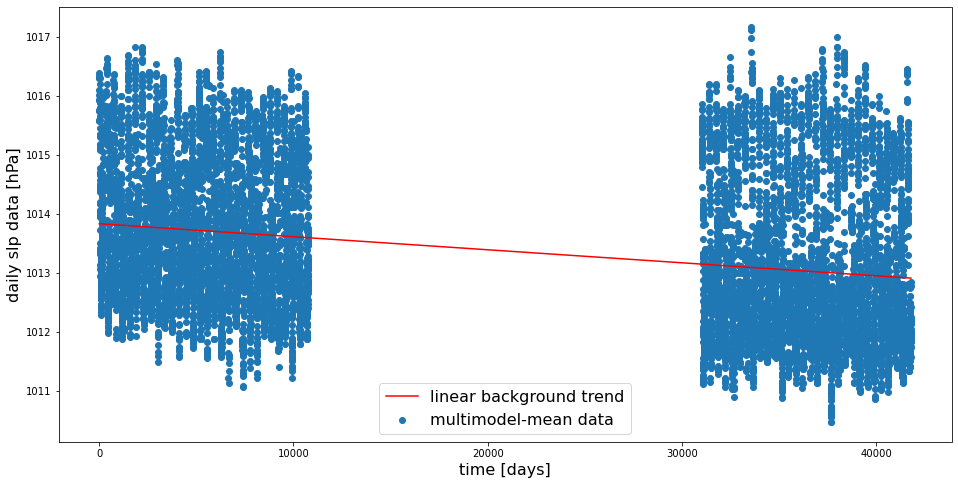

In [43]:
fig = plt.figure(figsize=(16, 8))
plt.xlabel("time [days]",fontsize=16)
plt.ylabel("daily slp data [hPa]", fontsize=16)
plt.plot(time,fit_fn(time),color="red", label="linear background trend")
plt.scatter(time,np.mean(var_modelmean,axis=0),  label= "multimodel-mean data")
plt.legend(fontsize=16)
plt.savefig(r"N:/atm_glomod/user/jomuel001/Dokumente/MasterThesis/figures/sample/Backgroundtrend.png",dpi=300)
plt.show()

# SI ANOMALY Calculation

In [16]:
import xarray as xr
import os as os
import pandas as pd
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
def calculate_mean_2d_fast(array):
    array = np.array(array)
    filtered_array = array[ (array <= 100)]
    mean = np.mean(filtered_array)
    return mean


path = r"N:/atm_glomod/user/jomuel001/CMIP6_models/MPI-ESM1-2-LR/"
path_file = r"siconc_MPI-ESM1-2-LR_1979-2014.N_jjas_aac_remapbnds.nc"

fig = plt.figure(figsize=(8, 8))
map = Basemap(projection='ortho',lat_0=90, lon_0=360)
nc = NetCDFFile(path+path_file)
#print(nc)

path_file_2 = r"KMEANSslp_hpa_MPI-ESM1-2-LR_1979-2014.N_jjas_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA51979-2014slp_hpa_ERA5_1979-2014_jjas_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
data = pd.read_csv(path+"AREA.-90_90_89.7849_29.0866/CLUSTER/"+path_file_2, skiprows=0, header=None, delimiter=' ')
#cluster = data
dates = np.array(data)[:,3]

lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time = nc.variables['time'][:]
var = nc.variables['siconc'][:] # mean sea level pressure
#print(time)
months= ['June', 'July', 'August', 'September']
days = [30,31,31,30]
days_month = [0,30,61,92] #cl1 #cl2 #cl3 #cl4 #cl5
SI_mean_year = {months[0] : [[],[],[],[],[]],
               months[1] : [[],[],[],[],[]],
               months[2] : [[],[],[],[],[]],
               months[3] : [[],[],[],[],[]]
              }
SI_mean_all = {months[0] : [[],[],[],[],[]],
               months[1] : [[],[],[],[],[]],
               months[2] : [[],[],[],[],[]],
               months[3] : [[],[],[],[],[]]
              }
OccProb_mean_year = {months[0] : [[],[],[],[],[]],
               months[1] : [[],[],[],[],[]],
               months[2] : [[],[],[],[],[]],
               months[3] : [[],[],[],[],[]]
              }
OccProb_mean_all = {months[0] : [[],[],[],[],[]],
               months[1] : [[],[],[],[],[]],
               months[2] : [[],[],[],[],[]],
               months[3] : [[],[],[],[],[]]
              }
OccProb_stadev_all = {months[0] : [[],[],[],[],[]],
               months[1] : [[],[],[],[],[]],
               months[2] : [[],[],[],[],[]],
               months[3] : [[],[],[],[],[]]
              }
SI_OccProb_all = {"SI_conc" : [],
                 "OccProb" : []}
for year in range(0,36):
    for month in range(0,len(months)):
        for day in range(1,days[month]+1):
            timestamp = day
            cluster = dates[timestamp+days_month[month]+year*122-1]-1
            SI_mean_year[months[month]][cluster].append(calculate_mean_2d_fast(var[timestamp+days_month[month]+year*122-1,:,:]))
            OccProb_mean_year[months[month]][cluster].append(1)
            SI_OccProb_all["SI_conc"].append(calculate_mean_2d_fast(var[timestamp+days_month[month]+year*122-1,:,:]))
            SI_OccProb_all["OccProb"].append(dates[timestamp+days_month[month]+year*122-1])
        for cluster in range(0,5):
            SI_mean_all[months[month]][cluster].append(np.mean(SI_mean_year[months[month]][cluster]))
            OccProb_mean_year[months[month]][cluster].extend([0] * (days[month] - len(OccProb_mean_year[months[month]][cluster])))
            OccProb_stadev_all[months[month]][cluster].append(np.std(OccProb_mean_year[months[month]][cluster]))
            OccProb_mean_all[months[month]][cluster].append(np.mean(OccProb_mean_year[months[month]][cluster]))
        SI_mean_year[months[month]] =  [[],[],[],[],[]]
        OccProb_mean_year[months[month]] =  [[],[],[],[],[]]

OccProb_mean_all = pd.DataFrame(OccProb_mean_all)
OccProb_stadev_all = pd.DataFrame(OccProb_stadev_all)
SI_mean_all = pd.DataFrame(SI_mean_all)
SI_OccProb_all = pd.DataFrame(SI_OccProb_all)
#print(SI_OccProb_all)
#print( SI_mean_all['June'][0])
years = range(1979,2015)
plt.errorbar(years, OccProb_mean_all['June'][0], label= "Clusterpattern 1",yerr = 0.5*OccProb_stadev_all['June'][0])
#plt.plot(years, SI_mean_all['June'][0], label= "Clusterpattern 1")
#plt.show()
#plt.plot(SI_mean_all['June'][0], OccProb_mean_all['June'][0])

<ipython-input-16-a9bba7c006f3>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-16-a9bba7c006f3>:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-16-a9bba7c006f3>:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this 

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 576x576 with 0 Axes>

In [17]:
OccProb_stadev_all['June'][0]

[0.49553562491061687,
 0.4000000000000001,
 0.4898979485566357,
 0.49888765156985887,
 0.33993463423951903,
 0.48189440982669857,
 0.37267799624996495,
 0.45825756949558394,
 0.0,
 0.24944382578492943,
 0.33993463423951903,
 0.0,
 0.24944382578492943,
 0.4898979485566357,
 0.4000000000000001,
 0.24944382578492943,
 0.4000000000000001,
 0.4898979485566357,
 0.3,
 0.4229525846816506,
 0.4988876515698589,
 0.4000000000000001,
 0.33993463423951903,
 0.33993463423951903,
 0.4229525846816506,
 0.44221663871405326,
 0.33993463423951903,
 0.0,
 0.33993463423951903,
 0.0,
 0.44221663871405326,
 0.4229525846816506,
 0.4229525846816506,
 0.44221663871405326,
 0.37267799624996495,
 0.4714045207910316]

In [28]:
np.std

<function numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)>

(5520, 6)


<ipython-input-5-1ff3b908acfc>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-5-1ff3b908acfc>:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-5-1ff3b908acfc>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this war

(5520, 80, 320)
Clusternumber1, 90_270ERA5
90_270
(5520, 6)


<ipython-input-5-1ff3b908acfc>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-5-1ff3b908acfc>:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-5-1ff3b908acfc>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this war

(5520, 80, 320)
Clusternumber2, 90_270ERA5
90_270
(5520, 6)


<ipython-input-5-1ff3b908acfc>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-5-1ff3b908acfc>:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-5-1ff3b908acfc>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this war

(5520, 80, 320)
Clusternumber3, 90_270ERA5
90_270
(5520, 6)


<ipython-input-5-1ff3b908acfc>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-5-1ff3b908acfc>:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-5-1ff3b908acfc>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this war

(5520, 80, 320)
Clusternumber4, 90_270ERA5
90_270
(5520, 6)


<ipython-input-5-1ff3b908acfc>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-5-1ff3b908acfc>:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-5-1ff3b908acfc>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this war

(5520, 80, 320)
Clusternumber5, 90_270ERA5
90_270


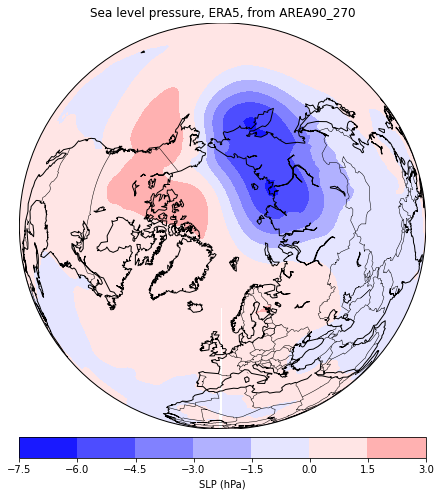

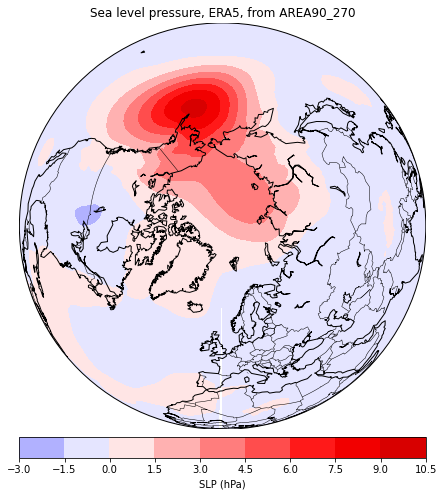

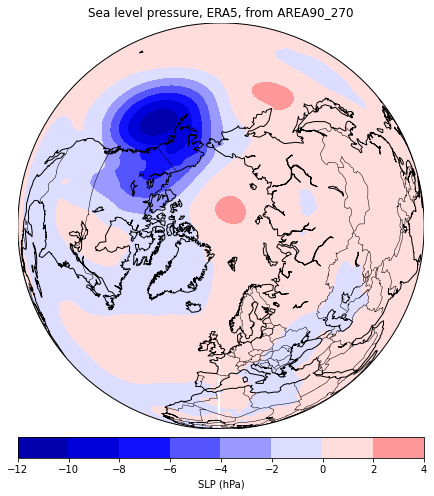

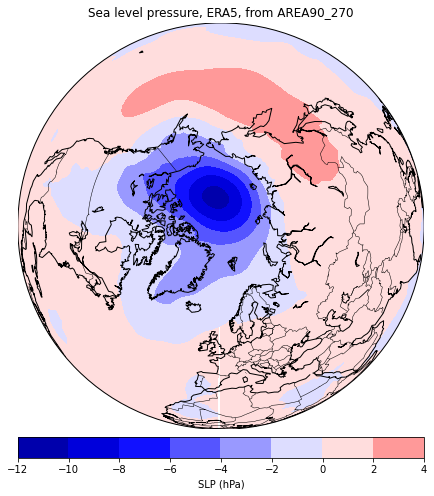

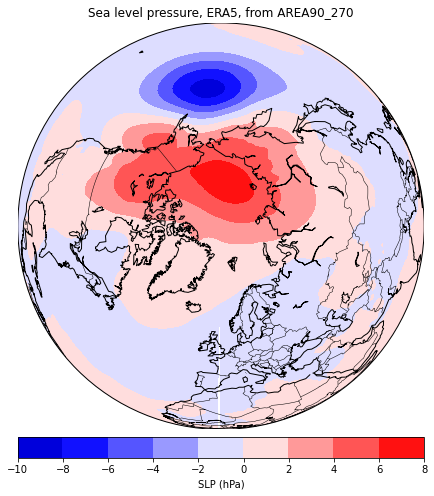

In [5]:
import xarray as xr
import os as os
import pandas as pd
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
Modell = 'ERA5'
AREA = "90_270"
for Nummer_cluster in range(1,6,1):
    filename = r"KMEANSslp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
    ordner = r"N:/atm_glomod/user/jomuel001/CMIP6_models/"+"ERA5"+r"/AREA."+ str(AREA) + "_89.7849_29.0866/CLUSTER/"

    path = r"N:/atm_glomod/user/jomuel001/CMIP6_models/"+ Modell + "/"
    #path = r"N:/atm_glomod/user/jomuel001/CMIP6_models/MPI-ESM1-2-LR/"
    path_file = r"slp_hpa_ERA5_1985-2014.N_mjjaso_atrbg_aacrm21_remapbnds.nc"
    nc = NetCDFFile(path+path_file)

    #load txt and load variables
    cluster_assignment = np.loadtxt(ordner+filename)
    print(np.shape(cluster_assignment))
    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    time = nc.variables['time_bnds'][:]
    try:
        var = nc.variables['psl'][:]
    except: 
        var = nc.variables['MSL'][:]
    #print(slp)
    print(np.shape(var))
    #assign data and cluster
    timestamps_1 = np.zeros((len(cluster_assignment[:,0]),3))
    timestamps_2 = np.zeros((len(cluster_assignment[:,0]),3))
    timestamps_3 = np.zeros((len(cluster_assignment[:,0]),3))
    timestamps_4 = np.zeros((len(cluster_assignment[:,0]),3))
    timestamps_5 = np.zeros((len(cluster_assignment[:,0]),3))
    
    boolean_1 = np.full((len(cluster_assignment), len(lat), len(lon)), False)
    boolean_2 = np.full((len(cluster_assignment), len(lat), len(lon)), False)
    boolean_3 = np.full((len(cluster_assignment), len(lat), len(lon)), False)
    boolean_4 = np.full((len(cluster_assignment), len(lat), len(lon)), False)
    boolean_5 = np.full((len(cluster_assignment), len(lat), len(lon)), False)

    #assighn psl values
    for  i in range(len(cluster_assignment[:,0])):
        read_cl = cluster_assignment[i,3]
        if read_cl == 1:
            timestamps_1[i,:] = cluster_assignment[i,:3]
            boolean_1[i,:,:] = True
        elif read_cl == 2:
            timestamps_2[i,:] = cluster_assignment[i,:3]
            boolean_2[i,:,:] = True
        elif read_cl == 3:
            timestamps_3[i,:] = cluster_assignment[i,:3]
            boolean_3[i,:,:] = True
        elif read_cl == 4:
            timestamps_4[i,:] = cluster_assignment[i,:3]
            boolean_4[i,:,:] = True
        elif read_cl == 5:
            timestamps_5[i,:] = cluster_assignment[i,:3]
            boolean_5[i,:,:] = True
    #create arrays with 




    #mean for cluster number 1  
    booleans = ["nix",boolean_1, boolean_2, boolean_3, boolean_4, boolean_5]

    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)


    #slp_mean = np.zeros((80,320))
    var_mean = np.ndarray.mean(var[:,:,:], axis = 0, where = booleans[Nummer_cluster]) #mean of all days in ts 1

    lons,lats = np.meshgrid(lon,lat)
    x,y = map(lons,lats)
    variable = map.contourf(x,y,var_mean[:,:],cmap = 'seismic',vmin =-15, vmax = 15)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('Sea level pressure, '+ str(Modell) + ", from AREA"+ str(AREA) )
    cb.set_label('SLP (hPa)')
    #print(np.size(time))
    map.drawcoastlines()
    map.drawcountries()

    print("Clusternumber"+ str(Nummer_cluster) +  ", " + str(AREA) + str(Modell))
    print(str(AREA))
    plt.savefig(str(ordner) + "/PLOTS/slp_" + str(AREA) + "_1985-2014_10PC_" + "mean_Cl" + str(Nummer_cluster) + "assigment.png"  ,
                dpi=300,bbox_inches='tight')

# Annual mean of 1979-14 and 2065-2100 

<ipython-input-11-bd4f41cdce6b>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-11-bd4f41cdce6b>:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-11-bd4f41cdce6b>:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this 

[47205.5 47206.5 47207.5 ... 60161.5 60162.5 60163.5]
[ 2.78539079e-05 -1.01567602e-01]
ACCESS-CM2


<ipython-input-11-bd4f41cdce6b>:76: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-11-bd4f41cdce6b>:77: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-11-bd4f41cdce6b>:78: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this 

[47205.5 47206.5 47207.5 ... 60161.5 60162.5 60163.5]
[-5.92373830e-05  1.01478606e+03]
ACCESS-CM2


<Figure size 576x576 with 0 Axes>

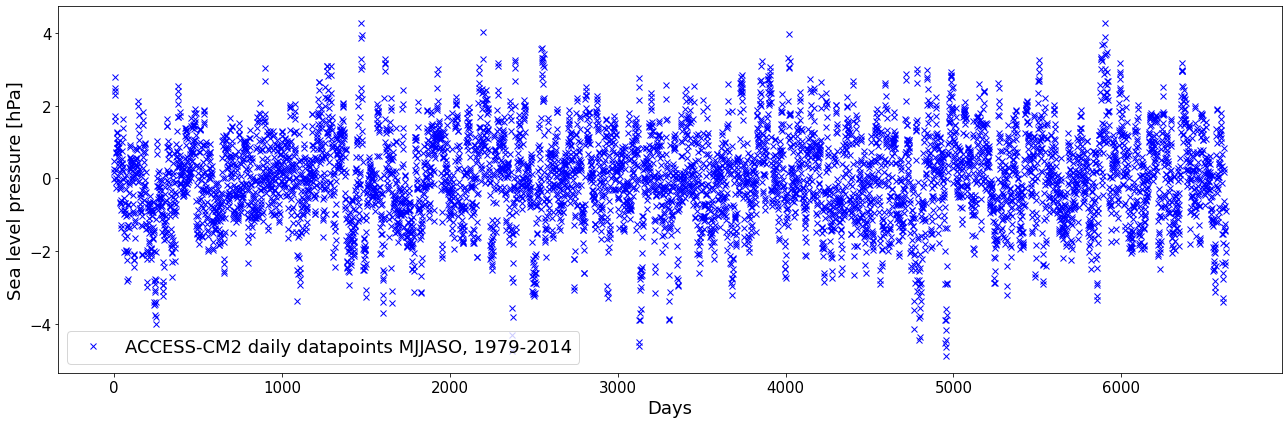

<Figure size 576x576 with 0 Axes>

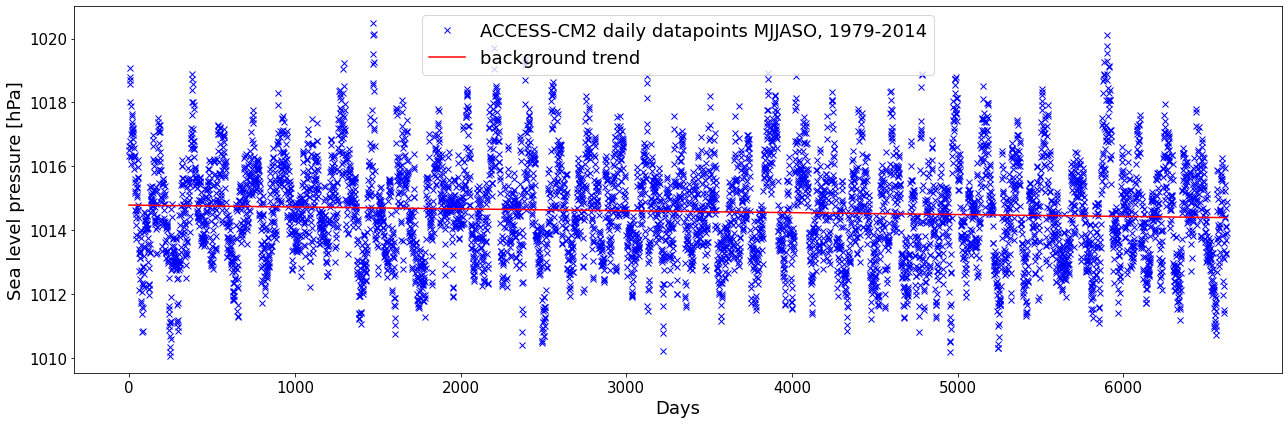

In [11]:
import xarray as xr
import os as os
import pandas as pd
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from scipy.fft import fft, ifft
import numpy as np
models = ["ACCESS-CM2"]
#models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", 
 #        "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
  #       "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
mean = []
FONTSIZE = 18
mean_years = []
for model in models:
    path = r"N:/atm_glomod/user/jomuel001/CMIP6_models/"+model+ "/"
    path_file = r"slp_hpa_"+model+"_1979-2014.N_mjjaso_atrbg_aacrm21_remapbnds.nc"
    path_file_neu = r"slp_hpa_"+model+"_1979-2014.N_mjjaso_remapbnds.nc"

    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    nc = NetCDFFile(path+path_file)
    #print(nc)
    #nc

    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    time = nc.variables['time'][:]
    var = nc.variables['psl'][:] # mean sea level pressure
    print(time)
    #jun-30, jul-31, aug-31, sep=30
    for i in range(len(time)):
        timestamp =  i
        #variable = map.contourf(x,y,var[timestamp,:,:],cmap = 'bwr')
        def calculate_mean_2d_fast(array):
            array = np.array(array)
            filtered_array = array[ (array <= 10000)]
            mean = np.mean(filtered_array)
            return mean
        mean.append(calculate_mean_2d_fast(var[timestamp,:,:])) 
    try:
        days = np.arange(0,6624,1)
        coef = np.polyfit(days,mean,1)
        poly1d_fn = np.poly1d(coef)
        plt.figure(figsize=(18,6))
        plt.plot(days, mean,"bx", label=model+" daily datapoints MJJASO, 1979-2014")#
        #plt.plot(days, poly1d_fn(days), 'r',label= "offset")
        print(coef)
    except:
        days = np.arange(0,6480,1)
        plt.figure(figsize=(18,6))
        plt.plot(days, mean,"x", label=model)
    print(model)
plt.xlabel('Days', fontsize=FONTSIZE)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=FONTSIZE)
plt.ylabel('Sea level pressure [hPa]', fontsize=FONTSIZE)
plt.tight_layout()
plt.savefig(r'N:\atm_glomod\user\jomuel001\Dokumente\plot_alt.png',dpi = 300)    
    

mean = []
mean_years = []
for model in models:
    path = r"N:/atm_glomod/user/jomuel001/CMIP6_models/"+model+ "/"

    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    nc = NetCDFFile(path+path_file_neu)
    #print(nc)
    #nc

    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    time = nc.variables['time'][:]
    var = nc.variables['psl'][:] # mean sea level pressure
    print(time)
    #jun-30, jul-31, aug-31, sep=30
    for i in range(len(time)):
        timestamp =  i
        #variable = map.contourf(x,y,var[timestamp,:,:],cmap = 'bwr')
        def calculate_mean_2d_fast(array):
            array = np.array(array)
            filtered_array = array[ (array <= 10000)]
            mean = np.mean(filtered_array)
            return mean
        mean.append(calculate_mean_2d_fast(var[timestamp,:,:]))
    try:
        days = np.arange(0,6624,1)
        coef = np.polyfit(days,mean,1)
        poly1d_fn = np.poly1d(coef)
        plt.figure(figsize=(18,6))
        plt.plot(days, mean,"bx", label=model+" daily datapoints MJJASO, 1979-2014")#
        plt.plot(days, poly1d_fn(days), 'r',label= "background trend")
        print(coef)
    except:
        days = np.arange(0,6480,1)
        plt.figure(figsize=(18,6))
        plt.plot(days, mean,"x", label=model)
    print(model)
plt.xlabel('Days', fontsize=FONTSIZE)
plt.legend(fontsize=FONTSIZE)
plt.ylabel('Sea level pressure [hPa]', fontsize=FONTSIZE)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig(r'N:\atm_glomod\user\jomuel001\Dokumente\plot_neu.png',dpi = 300)    
# cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
# plt.title('Sea level pressure')
# cb.set_label('slp anomaly [hpa]')
# #cb.clim(0,1)
# #cb.set_clim(vmin=0,vmax=100)
# #print(np.size(time))
# map.drawcoastlines()
# map.drawcountries()

# print(time[timestamp])
# Jahr = int(str(time[timestamp])[:2])+1932
# Monat = int(str(time[timestamp])[2])+4
# Tag = int(str(time[timestamp])[3:5])-35
# print('Datum : '+str(Tag)+'.'+str(Monat)+'.'+str(Jahr))
#print(np.mean(var))
#print(max(slp[timestamp,:1,:]))

<ipython-input-4-cab397ba2314>:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-4-cab397ba2314>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-4-cab397ba2314>:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this war

(80, 320)
(80, 320)


<ipython-input-4-cab397ba2314>:71: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,u_wind_1[:,:],cmap = "PiYG",levels=levels, boundaries=boundaries,zorder=5,extend='both')


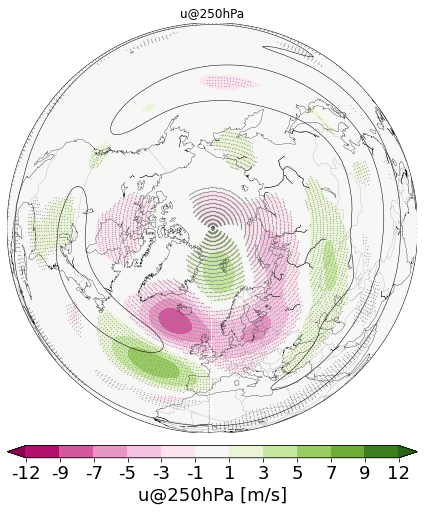

<ipython-input-4-cab397ba2314>:89: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,u_wind_2[:,:],cmap = "PiYG",levels=levels, boundaries=boundaries,zorder=5,extend='both')


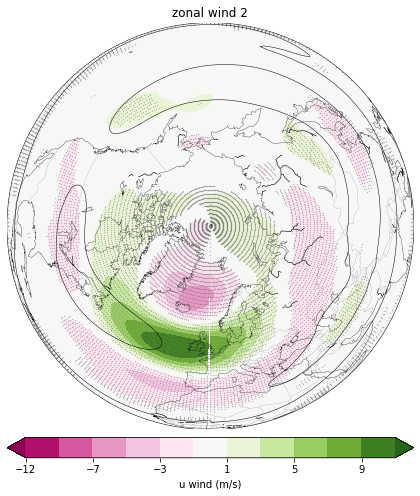

<ipython-input-4-cab397ba2314>:105: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,u_wind_3[:,:],cmap = "PiYG",levels=levels, boundaries=boundaries,zorder=5,extend='both')


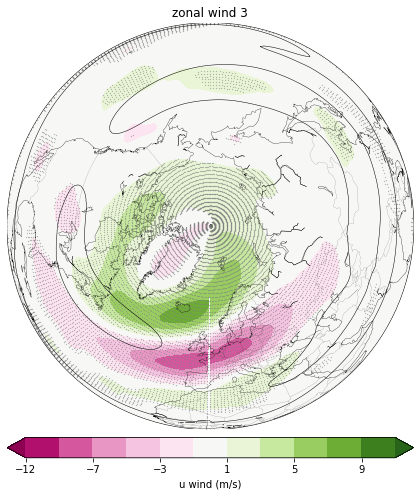

<ipython-input-4-cab397ba2314>:121: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,u_wind_4[:,:],cmap = "PiYG",levels=levels, boundaries=boundaries,zorder=5,extend='both')


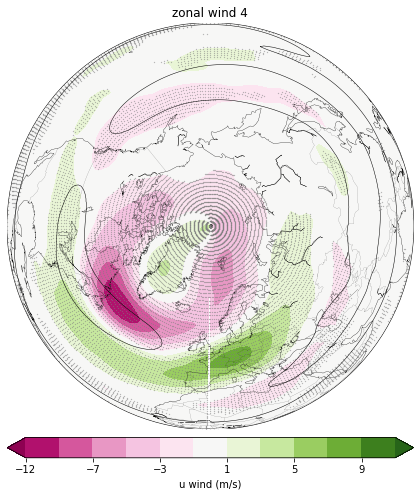

<ipython-input-4-cab397ba2314>:137: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,u_wind_5[:,:],cmap = "PiYG", levels=levels, boundaries=boundaries,zorder=5,extend='both')


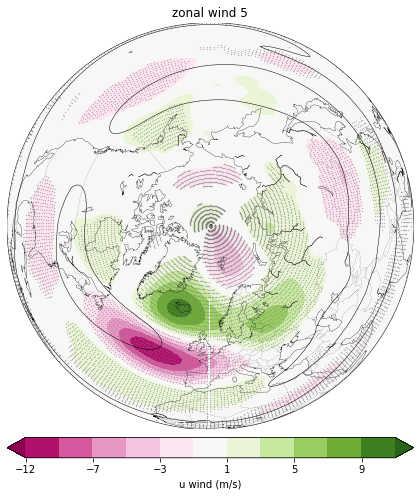

In [4]:
import xarray as xr
import os as os
import pandas as pd
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.fft import fft, fftfreq
#import scipy.stats as stats
import numpy as np
models = ["ERA5"]
#models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", 
 #        "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
  #       "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
area="-90_90"
datesfile=r"N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/AREA."+area+"_89.7849_29.0866/CLUSTER/KMEANSslp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
FONTSIZE = 18
for model in models:
    path = r"N:/atm_glomod/user/jomuel001/CMIP6_models_uwind/"+model+"_u250/"
    path_file = r"u250_"+model+"_1985-2014.N_mjjaso_atrbg_aacrm21_remapbnds.nc"
    path_climatology = r"N:/atm_glomod/user/jomuel001/CMIP6_models_uwind/"+model+"_u250/u250_ERA5_1985-2014.N_mjjaso_remapbnds.nc"
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    nc = NetCDFFile(path+path_file)
    nc_climatology = NetCDFFile(path_climatology)
    #print(nc)
    #nc

    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    time = nc.variables['time'][:]
    var = nc.variables['U'][:] # zonal wind
    var_climatology = nc_climatology.variables['U'][:]
    u_wind_climatology = np.squeeze(var_climatology, axis=1)
    u_wind = np.squeeze(var, axis=1)
    lons,lats = np.meshgrid(lon,lat)
    x,y = map(lons,lats)
    dates=np.loadtxt(datesfile)
    cluster=dates[:5520,3] # weil auch zukunft in dem ding drin ist
    cluster_1 = [x == 1 for x in cluster]
    cluster_2 = [x == 2 for x in cluster]
    cluster_3 = [x == 3 for x in cluster]
    cluster_4 = [x == 4 for x in cluster]
    cluster_5 = [x == 5 for x in cluster]
    u_wind_1 = np.mean(u_wind[cluster_1,:,:],axis=0)
    u_wind_2 = np.mean(u_wind[cluster_2,:,:],axis=0)
    u_wind_3 = np.mean(u_wind[cluster_3,:,:],axis=0)
    u_wind_4 = np.mean(u_wind[cluster_4,:,:],axis=0)
    u_wind_5 = np.mean(u_wind[cluster_5,:,:],axis=0)
    
    p_values1 = perform_t_test(u_wind[cluster_1,:,:])  # Replace with your t-test function
    p_values2 = perform_t_test(u_wind[cluster_2,:,:])
    p_values3 = perform_t_test(u_wind[cluster_3,:,:])
    p_values4 = perform_t_test(u_wind[cluster_4,:,:])
    p_values5 = perform_t_test(u_wind[cluster_5,:,:])
    significance_threshold = 0.01
    significant_mask1 = p_values1 < significance_threshold
    significant_mask2 = p_values2 < significance_threshold
    significant_mask3 = p_values3 < significance_threshold
    significant_mask4 = p_values4 < significance_threshold
    significant_mask5 = p_values5 < significance_threshold
    
    print(np.shape(u_wind_1))
    levels = np.array([-12,-9,-7,-5,-3,-1,1,3,5,7,9,12])
    boundaries = np.linspace(-14, 14, 13)
    print(np.shape(np.mean(u_wind_climatology, axis=0)))
    levels_climatology = [-40,-20,0,20,40]
    map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5, zorder=10)
    variable = map.contourf(x,y,u_wind_1[:,:],cmap = "PiYG",levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points1 = np.where(significant_mask1)
    map.scatter(x[significant_points1], y[significant_points1], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="3%", pad="3%",ticks=[-12,-9,-7,-5,-3,-1,1,3,5,7,9,12])
    for t in cb.ax.get_xticklabels():
     t.set_fontsize(18)
    cb.set_ticklabels(["-12","-9","-7","-5","-3","-1","1","3","5","7","9","12"])
    plt.title('u@250hPa' )
    cb.set_label('u@250hPa [m/s]', fontsize=18)
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_uwind/"+model+"_u250/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_1_wind.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    levels_climatology = [-40,-20,0,20,40]
    map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,u_wind_2[:,:],cmap = "PiYG",levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points2 = np.where(significant_mask2)
    map.scatter(x[significant_points2], y[significant_points2], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('zonal wind 2' )
    cb.set_label('u wind (m/s)')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_uwind/"+model+"_u250/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_2_wind.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    levels_climatology = [-40,-20,0,20,40]
    map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,u_wind_3[:,:],cmap = "PiYG",levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points3 = np.where(significant_mask3)
    map.scatter(x[significant_points3], y[significant_points3], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('zonal wind 3' )
    cb.set_label('u wind (m/s)')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_uwind/"+model+"_u250/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_3_wind.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    levels_climatology = [-40,-20,0,20,40]
    map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,u_wind_4[:,:],cmap = "PiYG",levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points4 = np.where(significant_mask4)
    map.scatter(x[significant_points4], y[significant_points4], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('zonal wind 4' )
    cb.set_label('u wind (m/s)')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_uwind/"+model+"_u250/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_4_wind.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    levels_climatology = [-40,-20,0,20,40]
    map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,u_wind_5[:,:],cmap = "PiYG", levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points5 = np.where(significant_mask5)
    map.scatter(x[significant_points5], y[significant_points5], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('zonal wind 5' )
    cb.set_label('u wind (m/s)')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_uwind/"+model+"_u250/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_5_wind.png",dpi=300)
    plt.show()
   


In [28]:
np.shape(u_wind[cluster_1,:,:])[1]


80

In [19]:
models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", 
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
L=[]
L2=[]
for model in models:
    data= np.loadtxt("N:/atm_glomod/user/jomuel001/CMIP6_models/"+model+"/AREA.-90_90_89.7849_29.0866/EOF/VARslp_hpa_"+model+"_1985-2014.N_mjjaso_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA51985-2014slp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_cos_cov_svd",skiprows=1)
    data2= np.loadtxt("N:/atm_glomod/user/jomuel001/CMIP6_models/"+model+"/AREA.90_270_89.7849_29.0866/EOF/VARslp_hpa_"+model+"_1985-2014.N_mjjaso_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA51985-2014slp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_cos_cov_svd",skiprows=1)
    L.append(data[9,2])
    L2.append(data2[9,2])
print(L)
print(L2)
print(np.mean(L))
print(np.mean(L2))


[65.072143, 67.608231, 65.931171, 63.671773, 64.177334, 64.268008, 63.624395, 63.482973, 65.235772, 62.277887, 61.059834, 64.112585, 62.359627, 66.317669, 65.459252, 65.648049, 66.385588, 65.050302]
[65.318197, 66.301088, 64.819561, 62.560781, 63.906119, 63.941822, 62.500854, 61.941681, 65.708039, 62.536122, 61.529788, 62.757518, 61.207549, 64.817806, 65.63373, 65.348106, 65.164464, 65.015662]
64.54125516666667
63.94493816666667


<ipython-input-2-5968747aa942>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-2-5968747aa942>:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-2-5968747aa942>:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this war

(5520, 80, 320)


<ipython-input-2-5968747aa942>:73: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_1[:,:],cmap = "BrBG",levels=levels, boundaries=boundaries,zorder=5,extend='both')


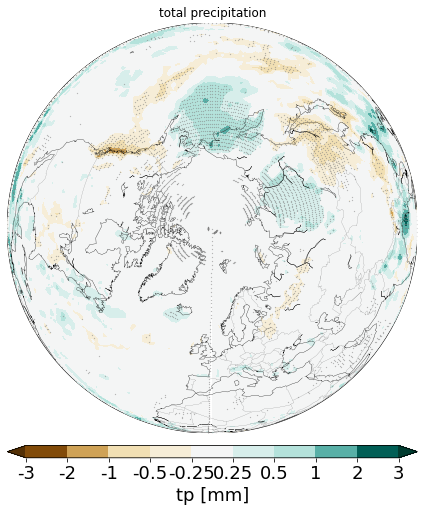

<ipython-input-2-5968747aa942>:91: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_2[:,:],cmap = "BrBG",levels=levels, boundaries=boundaries,zorder=5,extend='both')


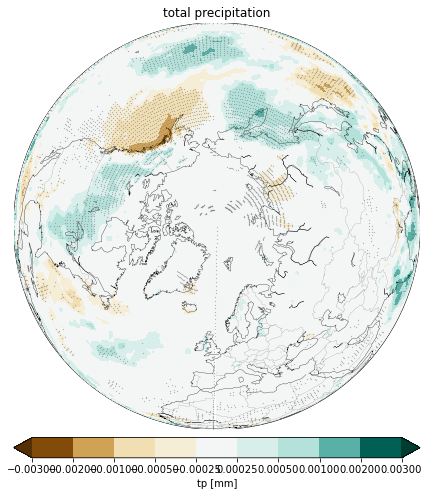

<ipython-input-2-5968747aa942>:111: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_3[:,:],cmap = "BrBG",levels=levels, boundaries=boundaries,zorder=5,extend='both')


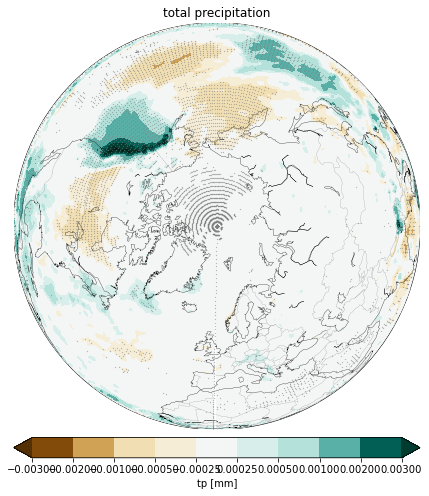

<ipython-input-2-5968747aa942>:127: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_4[:,:],cmap = "BrBG",levels=levels, boundaries=boundaries,zorder=5,extend='both')


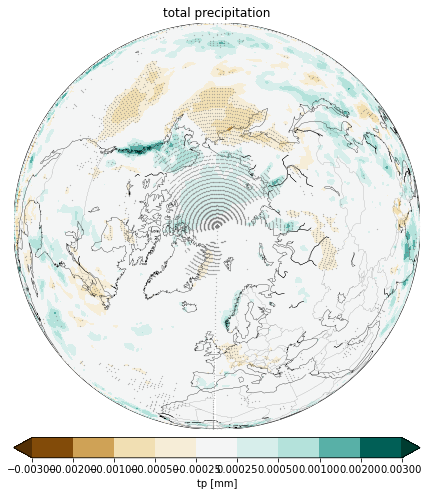

<ipython-input-2-5968747aa942>:143: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_5[:,:],cmap = "BrBG", levels=levels, boundaries=boundaries,zorder=5,extend='both')


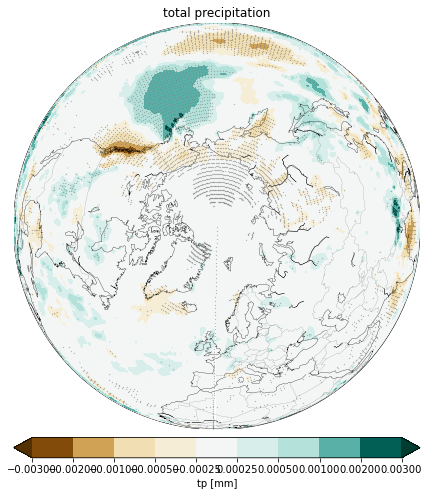

In [2]:
import xarray as xr
import os as os
import scipy.stats as stats
import pandas as pd
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.fft import fft, fftfreq
import numpy as np
models = ["ERA5"]
#models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", 
 #        "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
  #       "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
area="90_270"
datesfile=r"N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/AREA."+area+"_89.7849_29.0866/CLUSTER/KMEANSslp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
FONTSIZE = 18
for model in models:
    path = r"N:/atm_glomod/user/jomuel001/CMIP6_models_prec/"+model+"/"
    path_file = r"prec_"+model+"_1985-2014.N_mjjaso_atrbg_aacrm21_remap.nc"
    #path_climatology = r"N:/atm_glomod/user/jomuel001/CMIP6_models_prec/"+model+"/prec_ERA5_1985-2014.N_mjjaso_remapbnds.nc"
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    nc = NetCDFFile(path+path_file)
    #nc_climatology = NetCDFFile(path_climatology)
    #print(nc)
    #nc

    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    time = nc.variables['time'][:]
    var = nc.variables['var228'][:] # zonal wind
    print(np.shape(var))
    #var_climatology = nc_climatology.variables['U'][:]
    #u_wind_climatology = np.squeeze(var_climatology, axis=1)
    prec = var
    lons,lats = np.meshgrid(lon,lat)
    x,y = map(lons,lats)
    dates=np.loadtxt(datesfile)
    cluster=dates[:5520,3] # weil auch zukunft in dem ding drin ist
    cluster_1 = [x == 1 for x in cluster]
    cluster_2 = [x == 2 for x in cluster]
    cluster_3 = [x == 3 for x in cluster]
    cluster_4 = [x == 4 for x in cluster]
    cluster_5 = [x == 5 for x in cluster]
    prec_1 = np.mean(prec[cluster_1,:,:],axis=0)
    prec_2 = np.mean(prec[cluster_2,:,:],axis=0)
    prec_3 = np.mean(prec[cluster_3,:,:],axis=0)
    prec_4 = np.mean(prec[cluster_4,:,:],axis=0)
    prec_5 = np.mean(prec[cluster_5,:,:],axis=0)
    
    p_values1 = perform_t_test(prec[cluster_1,:,:])  # Replace with your t-test function
    p_values2 = perform_t_test(prec[cluster_2,:,:])
    p_values3 = perform_t_test(prec[cluster_3,:,:])
    p_values4 = perform_t_test(prec[cluster_4,:,:])
    p_values5 = perform_t_test(prec[cluster_5,:,:])
    significance_threshold = 0.01
    significant_mask1 = p_values1 < significance_threshold
    significant_mask2 = p_values2 < significance_threshold
    significant_mask3 = p_values3 < significance_threshold
    significant_mask4 = p_values4 < significance_threshold
    significant_mask5 = p_values5 < significance_threshold
    
    #print(np.shape(u_wind_1))
    levels = np.array([-0.003,-0.002,-0.001,-0.0005,-0.00025,0.00025,0.0005,0.001,0.002,0.003])
    boundaries = np.linspace(-0.004, 0.004, 13)
    #print(np.shape(np.mean(u_wind_climatology, axis=0)))
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5, zorder=10)
    variable = map.contourf(x,y,prec_1[:,:],cmap = "BrBG",levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points1 = np.where(significant_mask1)
    map.scatter(x[significant_points1], y[significant_points1], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="3%", pad="3%",ticks=[-0.003,-0.002,-0.001,-0.0005,-0.00025,0.00025,0.0005,0.001,0.002,0.003])
    for t in cb.ax.get_xticklabels():
     t.set_fontsize(18)
    cb.set_ticklabels(["-3","-2","-1","-0.5","-0.25","0.25","0.5","1","2","3"])
    plt.title('total precipitation' )
    cb.set_label('tp [mm]', fontsize=18)
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_prec/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_1_prec.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,prec_2[:,:],cmap = "BrBG",levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points2 = np.where(significant_mask2)
    map.scatter(x[significant_points2], y[significant_points2], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('total precipitation' )
    cb.set_label('tp [mm]')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_prec/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_2_prec.png",dpi=300)
    plt.show()
    
    

    levels = np.array([-0.003,-0.002,-0.001,-0.0005,-0.00025,0.00025,0.0005,0.001,0.002,0.003])
    boundaries = np.linspace(-0.004, 0.004, 13)
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,prec_3[:,:],cmap = "BrBG",levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points3 = np.where(significant_mask3)
    map.scatter(x[significant_points3], y[significant_points3], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('total precipitation' )
    cb.set_label('tp [mm]')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_prec/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_3_prec.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,prec_4[:,:],cmap = "BrBG",levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points4 = np.where(significant_mask4)
    map.scatter(x[significant_points4], y[significant_points4], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('total precipitation' )
    cb.set_label('tp [mm]')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_prec/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_4_prec.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,prec_5[:,:],cmap = "BrBG", levels=levels, boundaries=boundaries,zorder=5,extend='both')
    significant_points5 = np.where(significant_mask5)
    map.scatter(x[significant_points5], y[significant_points5], marker='.', color='grey', zorder=8,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('total precipitation' )
    cb.set_label('tp [mm]')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_prec/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_5_prec.png",dpi=300)
    plt.show()
   


<ipython-input-3-1dbc7adda2f1>:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc.variables['lat'][:]
<ipython-input-3-1dbc7adda2f1>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon'][:]
<ipython-input-3-1dbc7adda2f1>:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this war

(5520, 80, 320)


<ipython-input-3-1dbc7adda2f1>:72: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_1[:,:],cmap = "seismic",levels=levels, boundaries=boundaries,zorder=5)


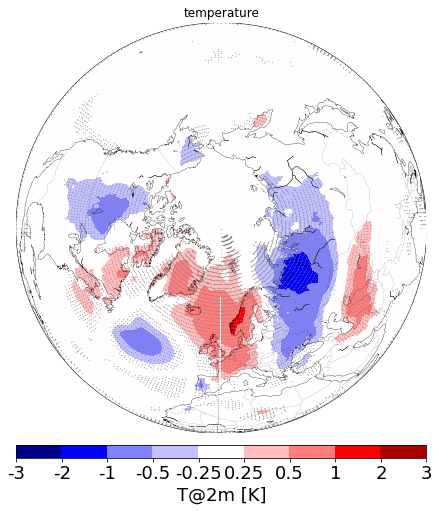

<ipython-input-3-1dbc7adda2f1>:90: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_2[:,:],cmap = "seismic",levels=levels, boundaries=boundaries,zorder=5)


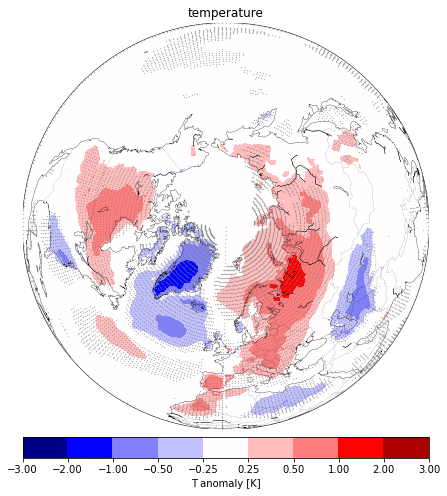

<ipython-input-3-1dbc7adda2f1>:106: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_3[:,:],cmap = "seismic",levels=levels, boundaries=boundaries,zorder=5)


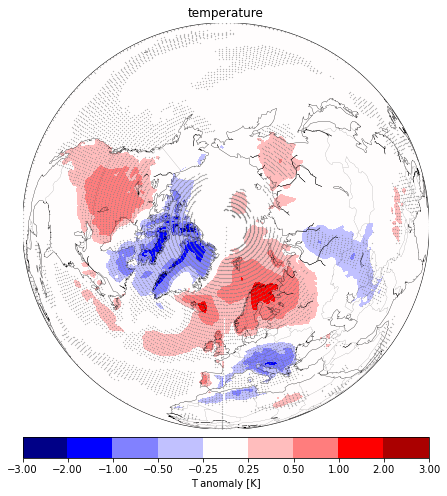

<ipython-input-3-1dbc7adda2f1>:122: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_4[:,:],cmap = "seismic",levels=levels, boundaries=boundaries,zorder=5)


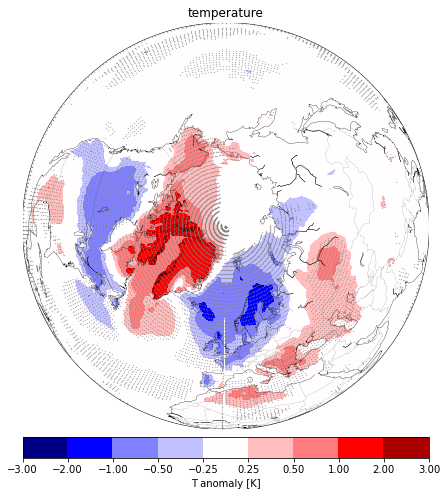

<ipython-input-3-1dbc7adda2f1>:138: UserWarning: The following kwargs were not used by contour: 'boundaries'
  variable = map.contourf(x,y,prec_5[:,:],cmap = "seismic", levels=levels, boundaries=boundaries,zorder=5)


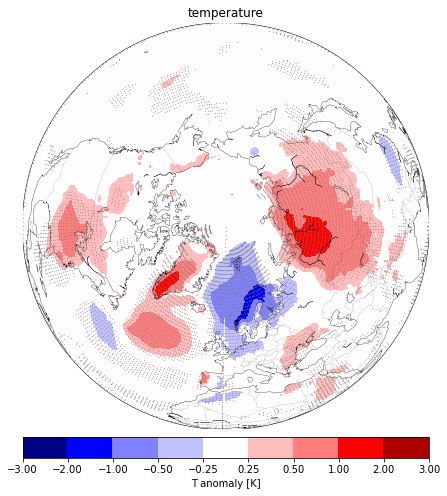

In [3]:
import xarray as xr
import os as os
import pandas as pd
import scipy.stats as stats
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.fft import fft, fftfreq
import numpy as np
models = ["ERA5"]
#models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", 
 #        "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
  #       "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
area="-90_90"
datesfile=r"N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/AREA."+area+"_89.7849_29.0866/CLUSTER/KMEANSslp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
FONTSIZE = 18
for model in models:
    path = r"N:/atm_glomod/user/jomuel001/CMIP6_models_tas/"+model+"/"
    path_file = r"t2m_"+model+"_1985-2014.N_mjjaso_atrbg_aacrm21_remap.nc"
    #path_climatology = r"N:/atm_glomod/user/jomuel001/CMIP6_models_prec/"+model+"/prec_ERA5_1985-2014.N_mjjaso_remapbnds.nc"
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    nc = NetCDFFile(path+path_file)
    #nc_climatology = NetCDFFile(path_climatology)
    #print(nc)
    #nc

    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    time = nc.variables['time'][:]
    var = nc.variables['var167'][:] # zonal wind
    print(np.shape(var))
    #var_climatology = nc_climatology.variables['U'][:]
    #u_wind_climatology = np.squeeze(var_climatology, axis=1)
    prec = var
    lons,lats = np.meshgrid(lon,lat)
    x,y = map(lons,lats)
    dates=np.loadtxt(datesfile)
    cluster=dates[:5520,3] # weil auch zukunft in dem ding drin ist
    cluster_1 = [x == 1 for x in cluster]
    cluster_2 = [x == 2 for x in cluster]
    cluster_3 = [x == 3 for x in cluster]
    cluster_4 = [x == 4 for x in cluster]
    cluster_5 = [x == 5 for x in cluster]
    prec_1 = np.mean(prec[cluster_1,:,:],axis=0)
    prec_2 = np.mean(prec[cluster_2,:,:],axis=0)
    prec_3 = np.mean(prec[cluster_3,:,:],axis=0)
    prec_4 = np.mean(prec[cluster_4,:,:],axis=0)
    prec_5 = np.mean(prec[cluster_5,:,:],axis=0)
    
    p_values1 = perform_t_test(prec[cluster_1,:,:])  # Replace with your t-test function
    p_values2 = perform_t_test(prec[cluster_2,:,:])
    p_values3 = perform_t_test(prec[cluster_3,:,:])
    p_values4 = perform_t_test(prec[cluster_4,:,:])
    p_values5 = perform_t_test(prec[cluster_5,:,:])
    significance_threshold = 0.01
    significant_mask1 = p_values1 < significance_threshold
    significant_mask2 = p_values2 < significance_threshold
    significant_mask3 = p_values3 < significance_threshold
    significant_mask4 = p_values4 < significance_threshold
    significant_mask5 = p_values5 < significance_threshold
    
    #print(np.shape(u_wind_1))
    levels = np.array([-3,-2,-1,-0.5,-0.25,0.25,0.5,1,2,3])
    boundaries = np.linspace(-0, 0.1, 13)
    #print(np.shape(np.mean(u_wind_climatology, axis=0)))
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5, zorder=10)
    variable = map.contourf(x,y,prec_1[:,:],cmap = "seismic",levels=levels, boundaries=boundaries,zorder=5)
    significant_points1 = np.where(significant_mask1)
    map.scatter(x[significant_points1], y[significant_points1], marker='.', color='grey', zorder=12,s=0.2)
    cb = map.colorbar(variable, "bottom", size="3%", pad="3%",ticks=[-3,-2,-1,-0.5,-0.25,0.25,0.5,1,2,3])
    for t in cb.ax.get_xticklabels():
     t.set_fontsize(18)
    cb.set_ticklabels(["-3","-2","-1","-0.5","-0.25","0.25","0.5","1","2","3"])
    plt.title('temperature' )
    cb.set_label('T@2m [K]', fontsize=18)
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_tas/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_1_t2m.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,prec_2[:,:],cmap = "seismic",levels=levels, boundaries=boundaries,zorder=5)
    significant_points2 = np.where(significant_mask2)
    map.scatter(x[significant_points2], y[significant_points2], marker='.', color='grey', zorder=12,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('temperature' )
    cb.set_label('T anomaly [K]')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_tas/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_2_t2m.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,prec_3[:,:],cmap = "seismic",levels=levels, boundaries=boundaries,zorder=5)
    significant_points3 = np.where(significant_mask3)
    map.scatter(x[significant_points3], y[significant_points3], marker='.', color='grey', zorder=12,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('temperature' )
    cb.set_label('T anomaly [K]')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_tas/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_3_t2m.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,prec_4[:,:],cmap = "seismic",levels=levels, boundaries=boundaries,zorder=5)
    significant_points4 = np.where(significant_mask4)
    map.scatter(x[significant_points4], y[significant_points4], marker='.', color='grey', zorder=12,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('temperature' )
    cb.set_label('T anomaly [K]')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_tas/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_4_t2m.png",dpi=300)
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    map = Basemap(projection='ortho',lat_0=90, lon_0=360)
    #levels_climatology = [-40,-20,0,20,40]
    #map.contour(x,y, np.mean(u_wind_climatology, axis=0),levels=levels_climatology, colors="black", linewidths=0.5,zorder=10)
    variable = map.contourf(x,y,prec_5[:,:],cmap = "seismic", levels=levels, boundaries=boundaries,zorder=5)
    significant_points5= np.where(significant_mask5)
    map.scatter(x[significant_points5], y[significant_points5], marker='.', color='grey', zorder=12,s=0.2)
    cb = map.colorbar(variable, "bottom", size="5%", pad="2%")
    plt.title('temperature' )
    cb.set_label('T anomaly [K]')
    #print(np.size(time))
    map.drawcoastlines(linewidth=0.3,zorder=6)
    map.drawcountries(linewidth=0.1,zorder=7)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models_tas/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/Cluster_5_t2m.png",dpi=300)
    plt.show()
   


In [17]:
np.shape(var)

(920, 80, 320)